In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Problem Statement
*This is a Real Estate price data. These estates are located all over the city and the prices have been decided as per the convenience and facilities available near to these estates.
This is a regression problem where we have to predict the prices of the estates as per the customer convenience he prefers.
Real Estate prediction is a very common real-life issue that each real estate agent faces at least once in its lifetime. If done correctly, it can save a lot of man-hours at the end and give the predictions correct.*

# Hypothesis generation
*There are some factors that should be brainstormed before getting into code. Below are some factors that matter and put a weightage on the required predictions:
        __House age:__ This is the age of the house which is a very important feature that how old the house is and how much more the life of the house will be.
        __Nearest to MRT Station:__ The should nearest to the MRT station will get costly because the convenience get better.
        __Convenience Stores:__ Near the stores, the more life will get more convenient as in case of emergencies, the products will be available just a foot away.
All the above factors make the difference between the low and high price houses.*

In [150]:
file = pd.read_csv('Real estate.csv')
file.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [151]:
file.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [152]:
def basic_info(df):
    print(df.info(),'\n',df.describe(),'\n',df.isna().sum(),'\n',file.shape)

In [153]:
basic_info(file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None 
                No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.1489

In [154]:
file.drop(columns=['No'], inplace=True)
file.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [155]:
file = file.dropna()
file.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Observations

*We can see that there are no null values.*

*Cleaning outliers.*

In [156]:
def z_score_outlier(data):
    for column in data.columns:
        upper_bound = data[column].mean() + 3 * data[column].std()
        lower_bound = data[column].mean() - 3 * data[column].std()
        data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [157]:
file = z_score_outlier(file)

In [158]:
file.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,2013.146571,17.641626,1011.459552,4.160099,24.969204,121.534114,38.116010
std,0.281744,11.437058,1128.951794,2.935771,0.012024,0.014212,12.885034
min,2012.667000,0.000000,23.382840,0.000000,24.932930,121.495070,7.600000
25%,2012.917000,8.900000,289.324800,1.000000,24.963050,121.529817,28.400000
50%,2013.167000,16.050000,492.231300,4.000000,24.971305,121.538870,38.850000
75%,2013.417000,27.900000,1412.735250,6.000000,24.977828,121.543480,46.600000
max,2013.583000,43.800000,4605.749000,10.000000,25.001150,121.566270,78.300000


In [159]:
basic_info(file)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     406 non-null    float64
 1   X2 house age                            406 non-null    float64
 2   X3 distance to the nearest MRT station  406 non-null    float64
 3   X4 number of convenience stores         406 non-null    int64  
 4   X5 latitude                             406 non-null    float64
 5   X6 longitude                            406 non-null    float64
 6   Y house price of unit area              406 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.4 KB
None 
        X1 transaction date  X2 house age  \
count           406.000000    406.000000   
mean           2013.146571     17.641626   
std               0.281744     11.437058   
min            2012.667000      0.000000 

# EDA

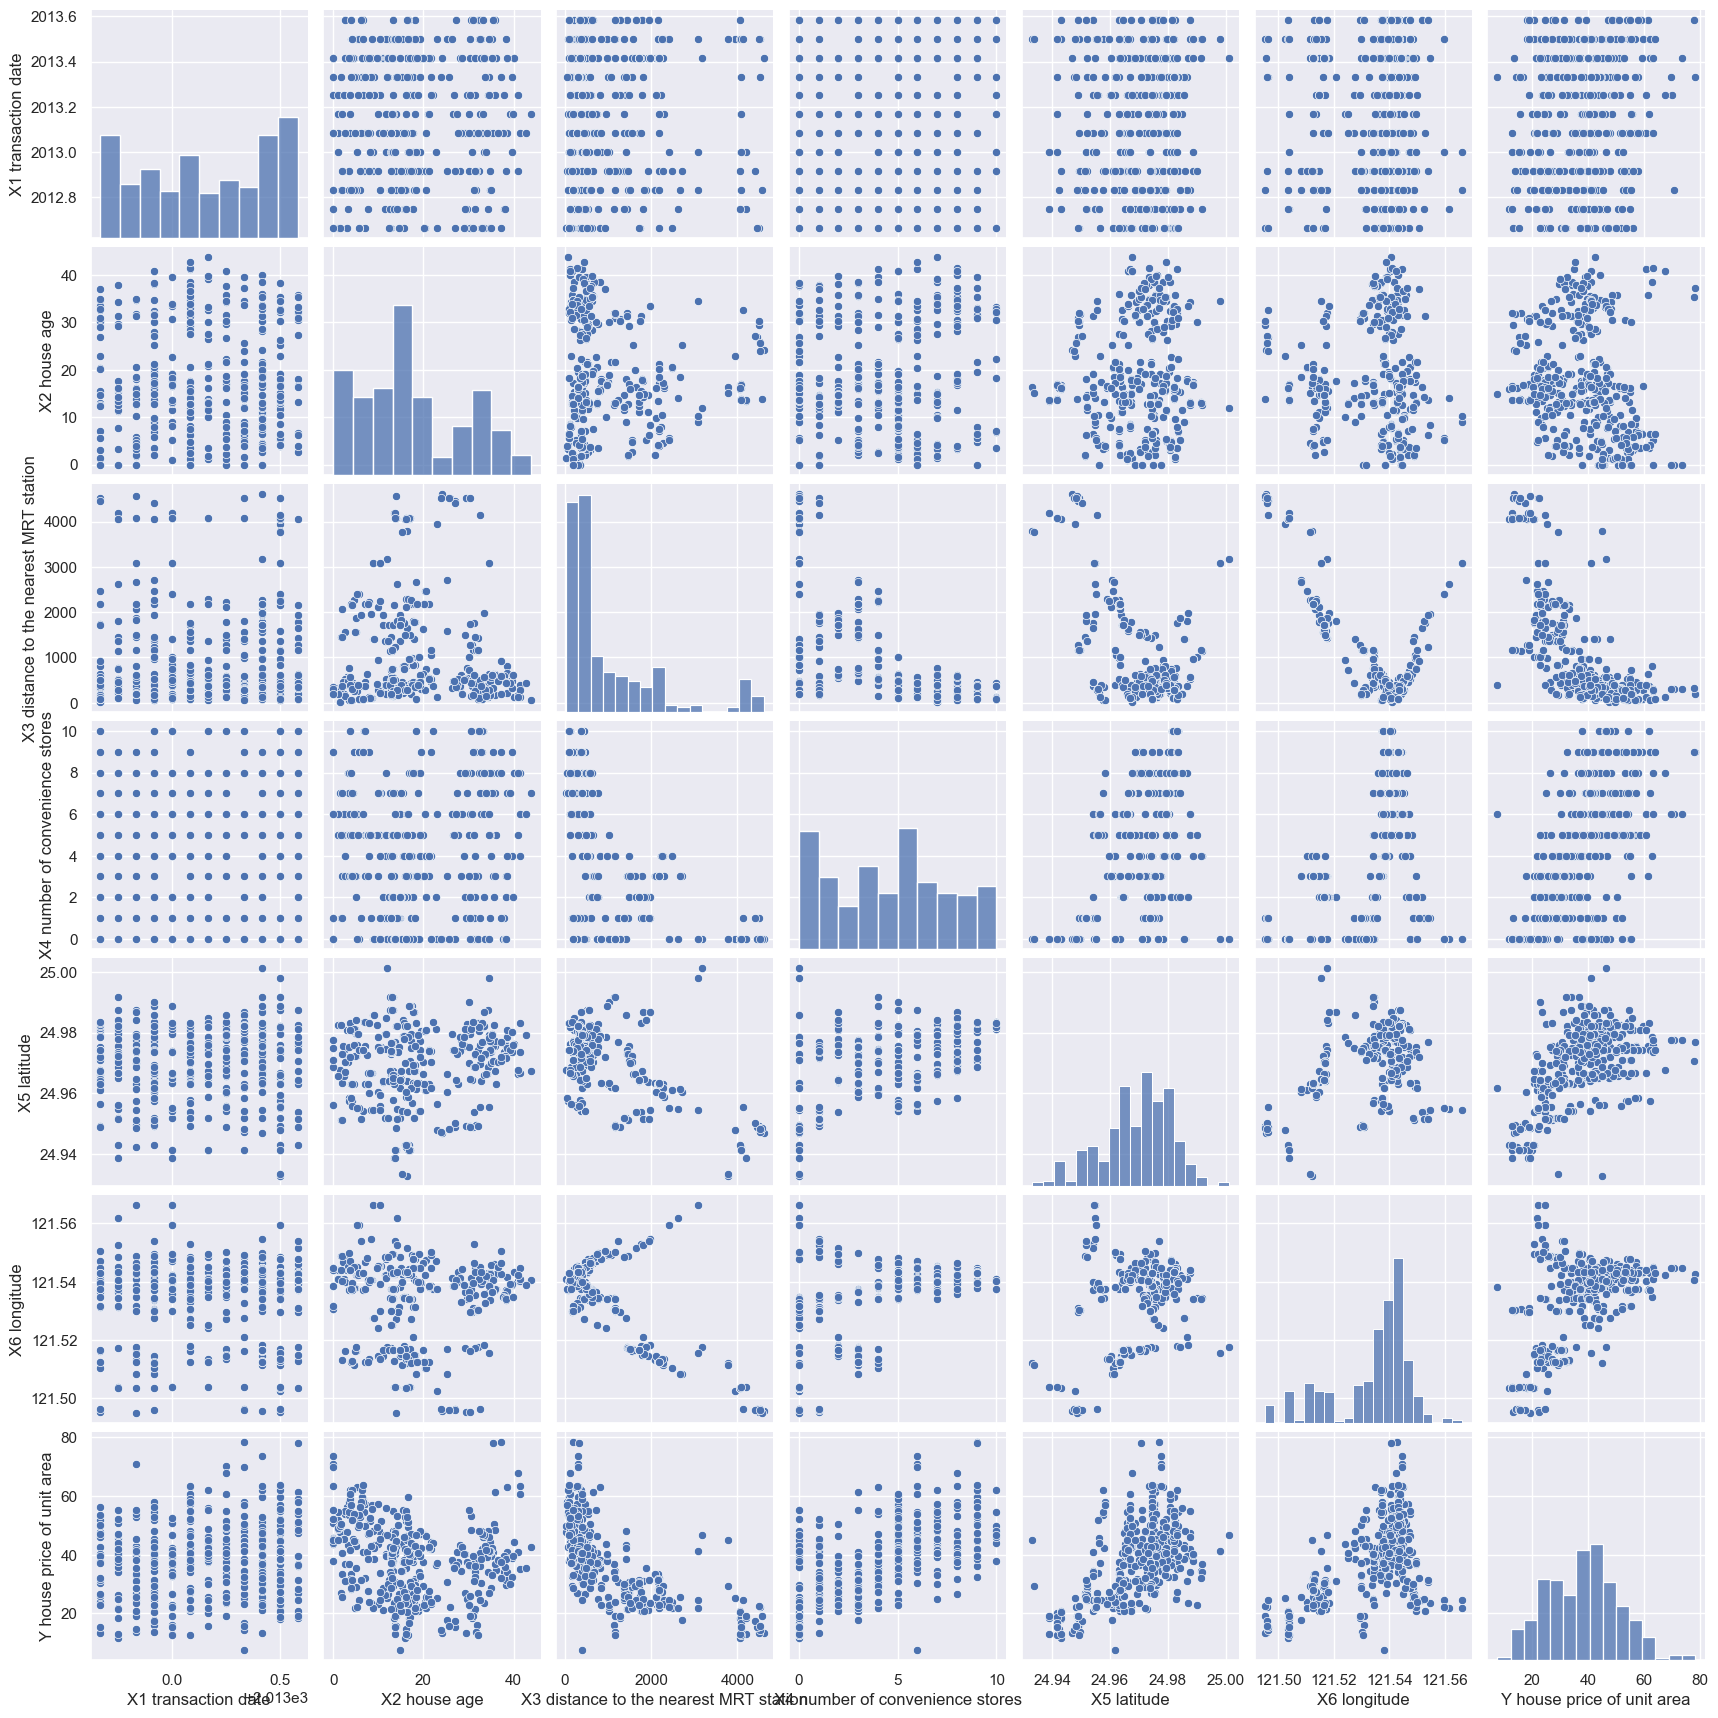

In [160]:
sns.pairplot(file)

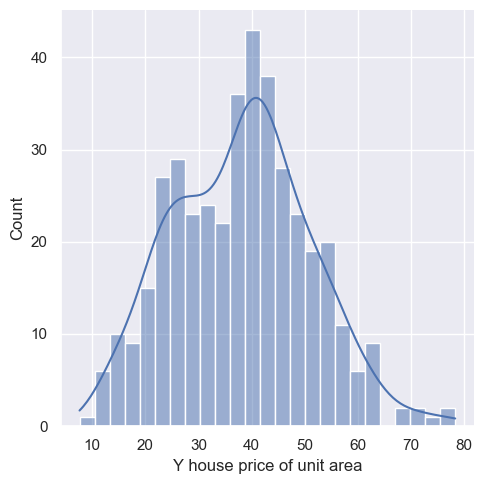

In [161]:
sns.displot(data= file, x='Y house price of unit area' , bins=25 , kde=True)

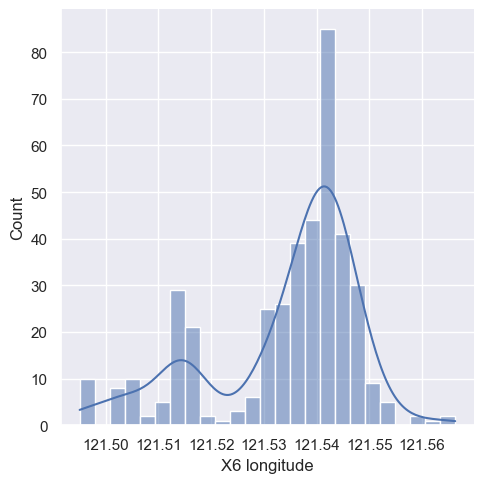

In [162]:
sns.displot(data= file, x='X6 longitude' , bins=25 , kde=True)

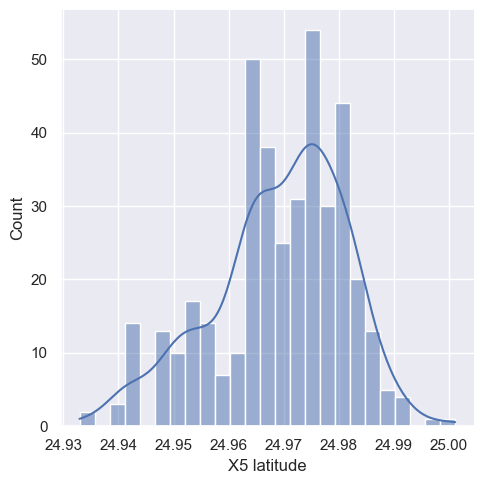

In [163]:
sns.displot(data= file, x='X5 latitude' , bins=25 , kde=True)

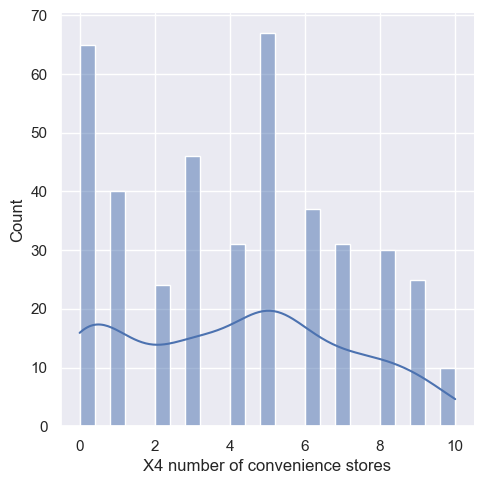

In [164]:
sns.displot(data= file, x='X4 number of convenience stores' , bins=25 , kde=True)

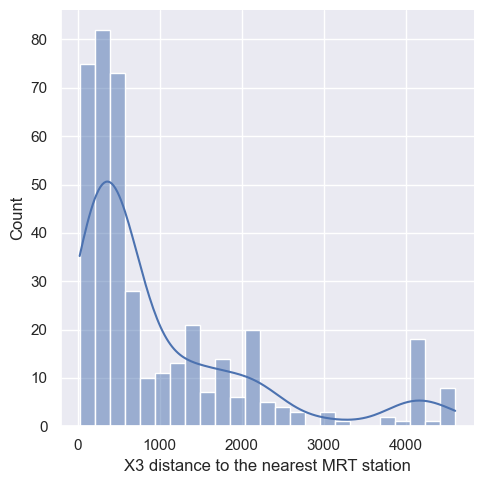

In [165]:
sns.displot(data= file, x='X3 distance to the nearest MRT station' , bins=25 , kde=True)

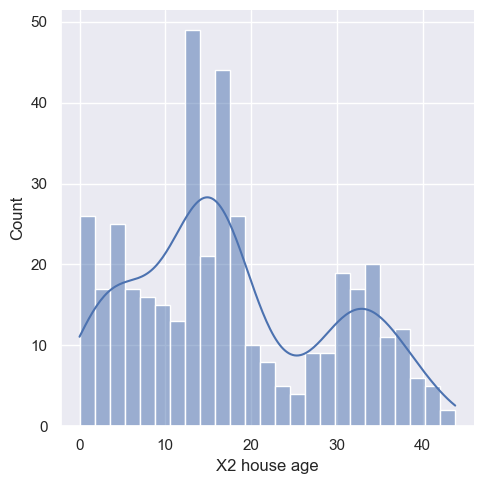

In [166]:
sns.displot(data= file, x='X2 house age' , bins=25 , kde=True)

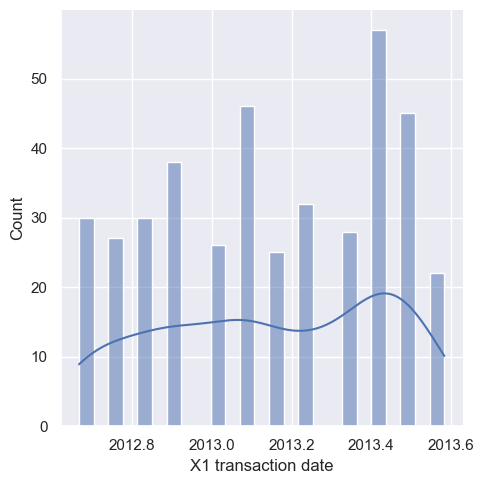

In [167]:
sns.displot(data= file, x='X1 transaction date' , bins=25 , kde=True)

<AxesSubplot: >

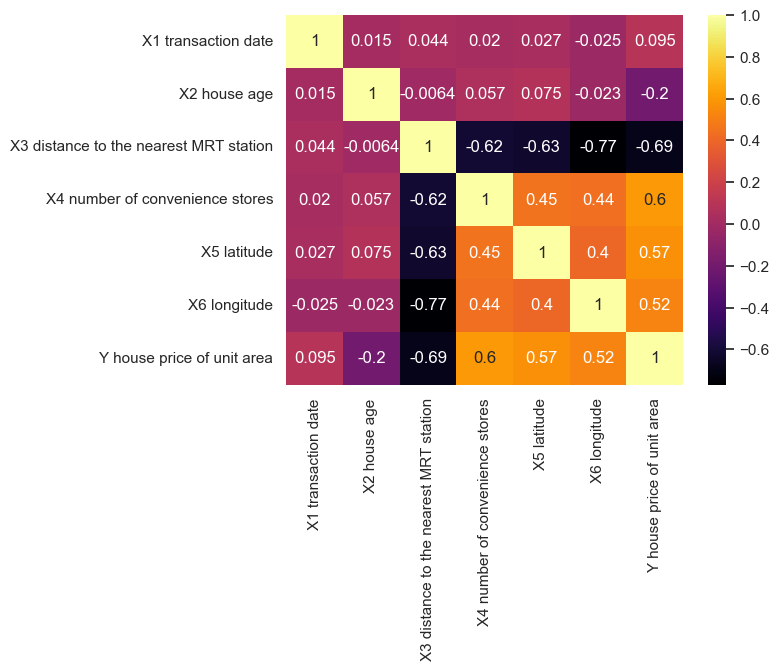

In [168]:
sns.heatmap(file.corr(),annot=True,cmap='inferno')

array([[<AxesSubplot: title={'center': 'X1 transaction date'}>,
        <AxesSubplot: title={'center': 'X2 house age'}>,
        <AxesSubplot: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot: title={'center': 'X4 number of convenience stores'}>,
        <AxesSubplot: title={'center': 'X5 latitude'}>,
        <AxesSubplot: title={'center': 'X6 longitude'}>],
       [<AxesSubplot: title={'center': 'Y house price of unit area'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

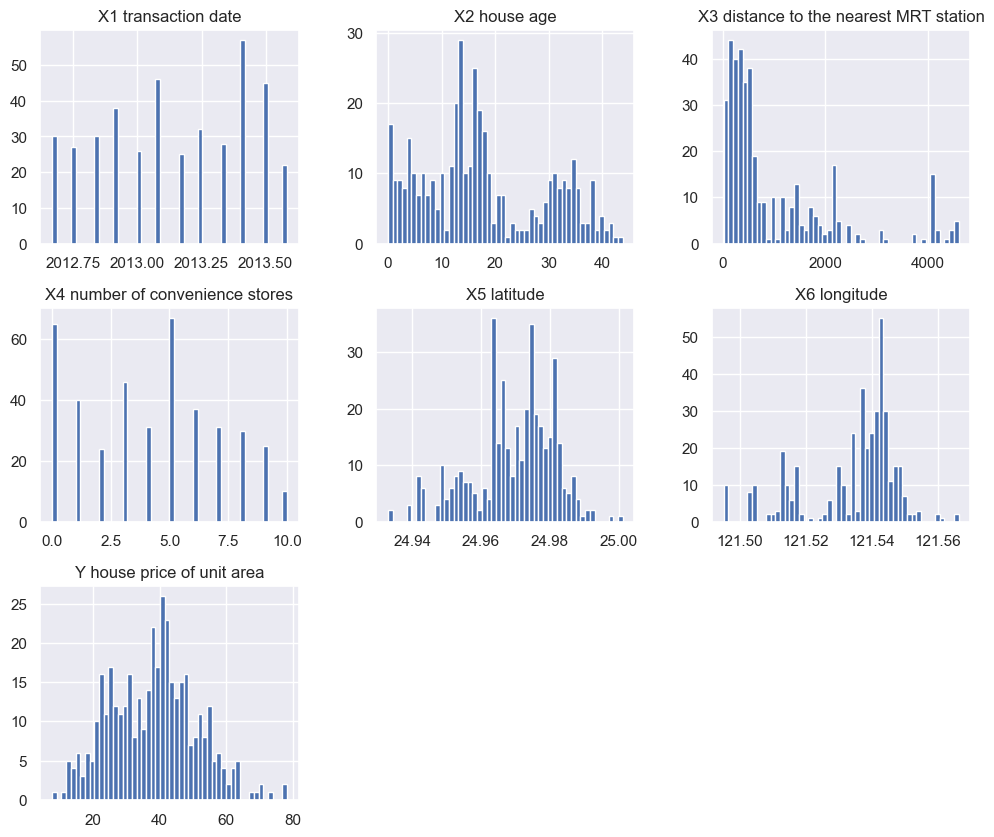

In [169]:
file.hist(bins=50, figsize=(12, 10))

### Effect of location on price

<AxesSubplot: xlabel='X6 longitude', ylabel='X5 latitude'>

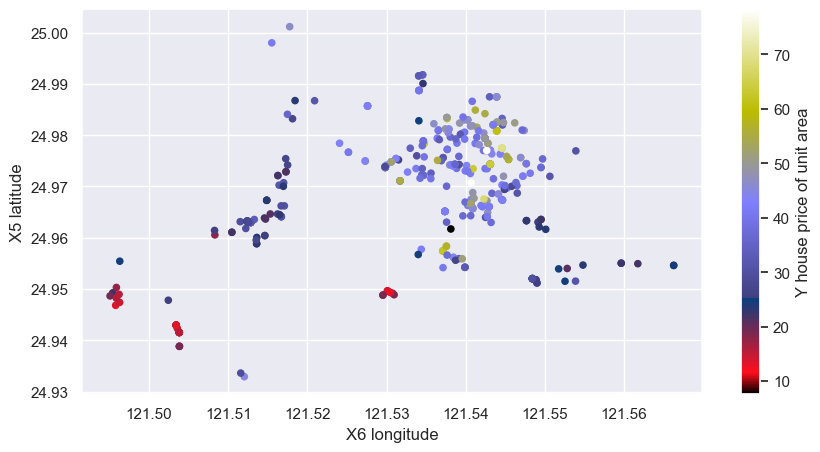

In [170]:
file.plot(kind='scatter', x='X6 longitude', y='X5 latitude', c='Y house price of unit area',
          cmap=plt.get_cmap("gist_stern"), colorbar=True, figsize=(10, 5))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6296\3636010579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_longitude['Dataset'] = 'H'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6296\3636010579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_longitude['Dataset'] = 'L'


<AxesSubplot: xlabel='Dataset', ylabel='Y house price of unit area'>

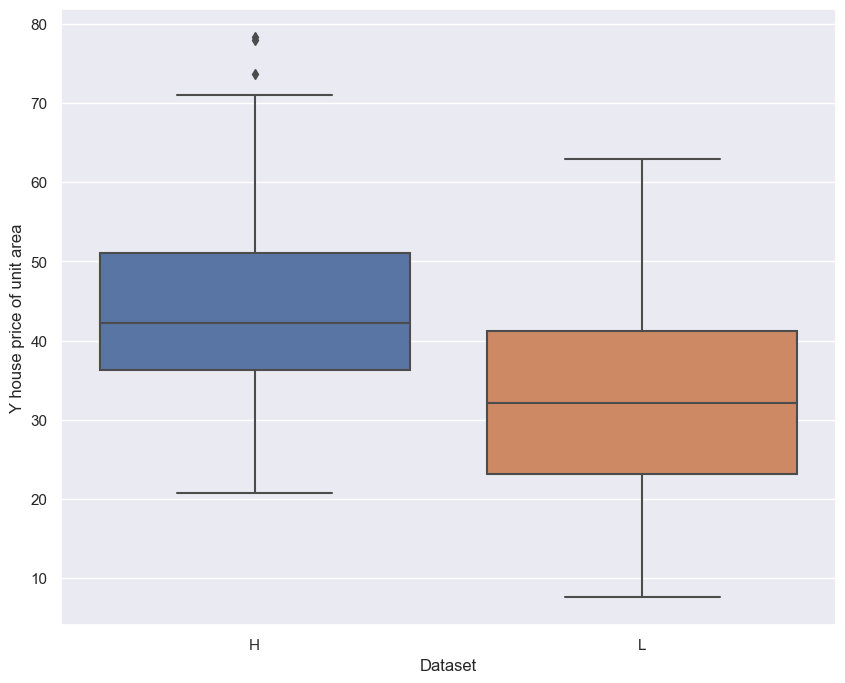

In [171]:
high_longitude = file[file['X6 longitude'] >= 121.538630]
low_longitude = file[file['X6 longitude'] < 121.538630]
high_longitude['Dataset'] = 'H'
low_longitude['Dataset'] = 'L'
merged_df = pd.concat([high_longitude, low_longitude])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(x='Dataset', y='Y house price of unit area', data=merged_df)

<AxesSubplot: xlabel='Dataset', ylabel='Y house price of unit area'>

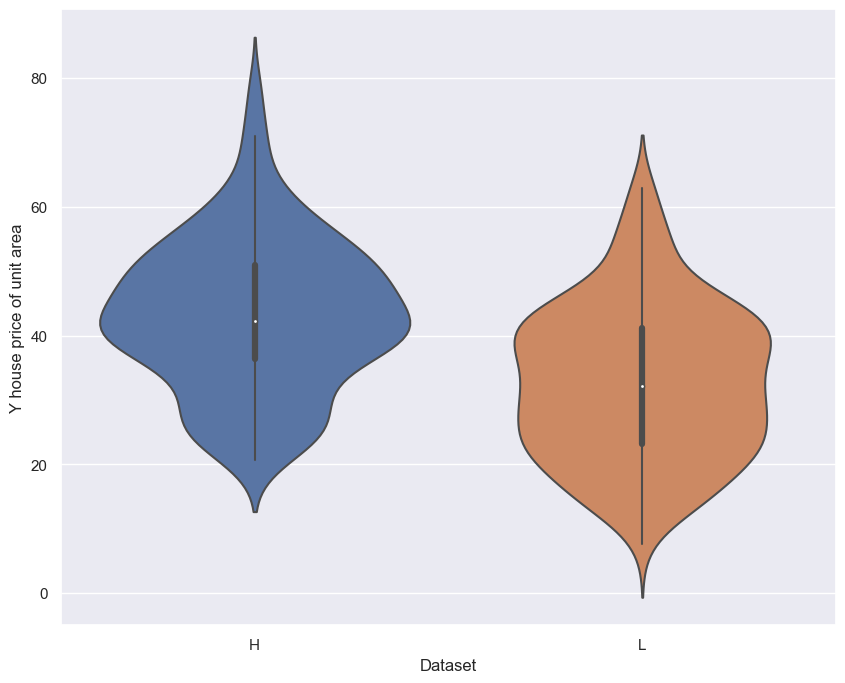

In [172]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df)

### Effect of age on price

<AxesSubplot: xlabel='House age', ylabel='House price of unit area'>

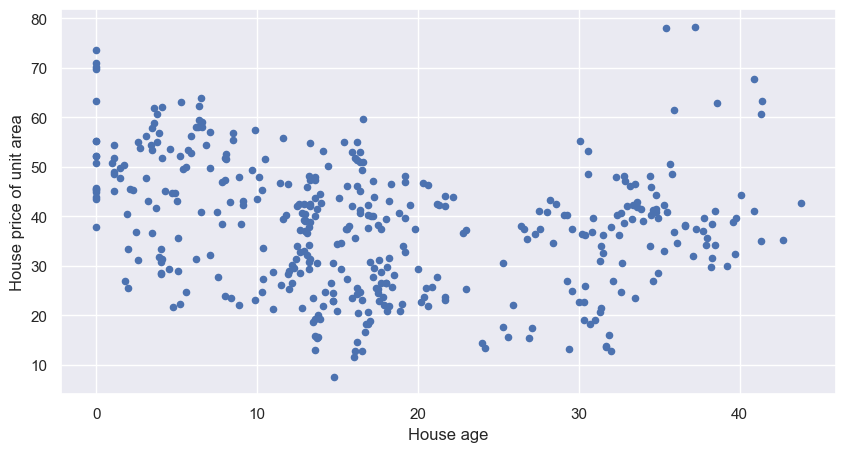

In [173]:
file.plot(kind='scatter', x='X2 house age', y='Y house price of unit area', figsize=(10, 5), xlabel='House age', ylabel='House price of unit area')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6296\1523761638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_house['Dataset'] = 'O'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6296\1523761638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_house['Dataset'] = 'N'


<AxesSubplot: xlabel='Dataset', ylabel='Y house price of unit area'>

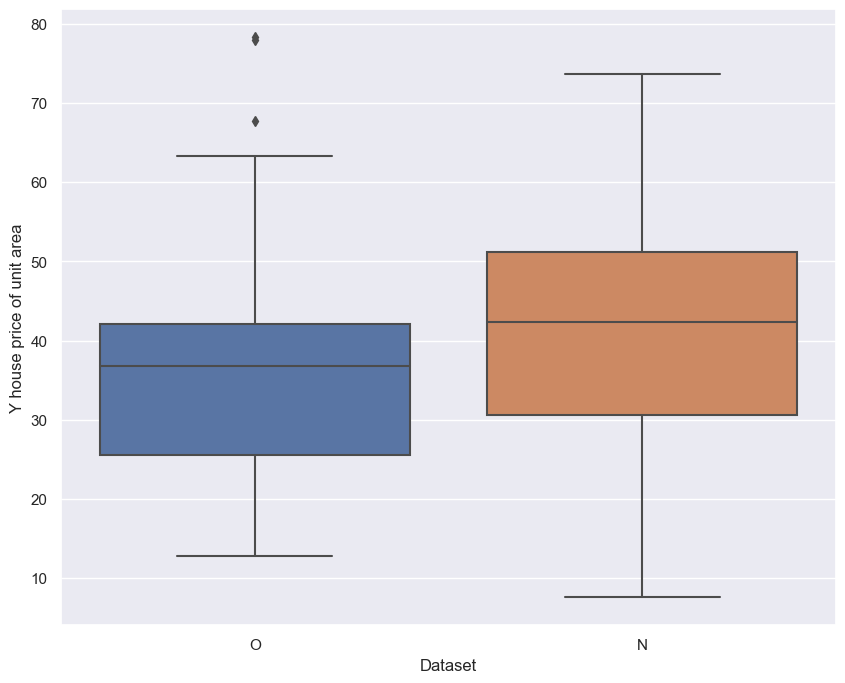

In [174]:
old_house = file[file['X2 house age'] >= 16.1]
new_house = file[file['X2 house age'] < 16.1]
old_house['Dataset'] = 'O'
new_house['Dataset'] = 'N'
merged_df = pd.concat([old_house, new_house])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(x='Dataset', y='Y house price of unit area', data=merged_df)

<AxesSubplot: xlabel='Dataset', ylabel='Y house price of unit area'>

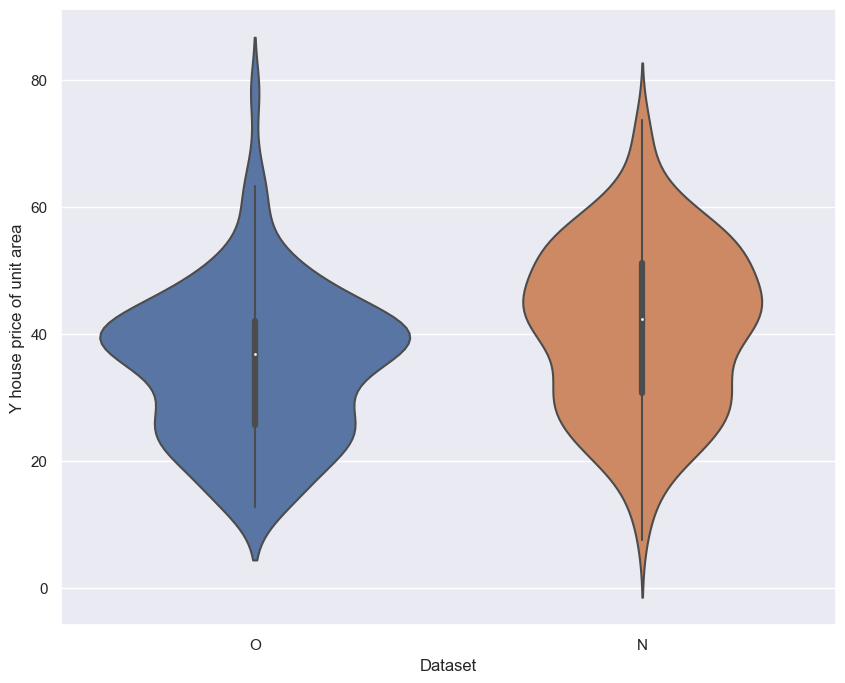

In [175]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df)

### effect of number of convenience stores on price

<AxesSubplot: xlabel='number of convenience stores', ylabel='House price of unit area'>

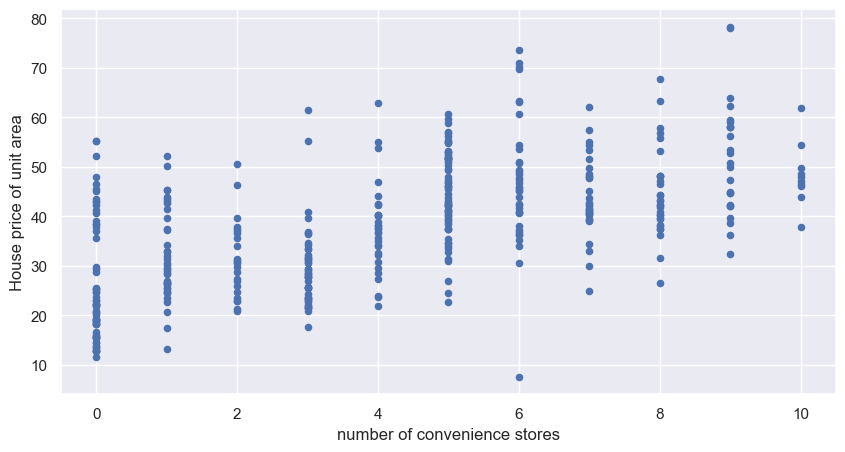

In [176]:
file.plot(kind='scatter', x='X4 number of convenience stores', y='Y house price of unit area', figsize=(10, 5), xlabel='number of convenience stores', ylabel='House price of unit area')

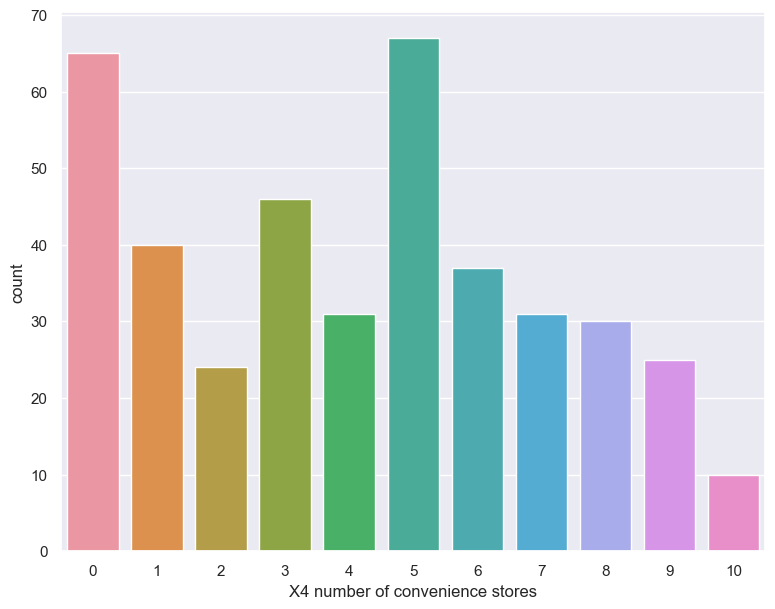

In [177]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.countplot(x='X4 number of convenience stores', data=file)
plt.show()

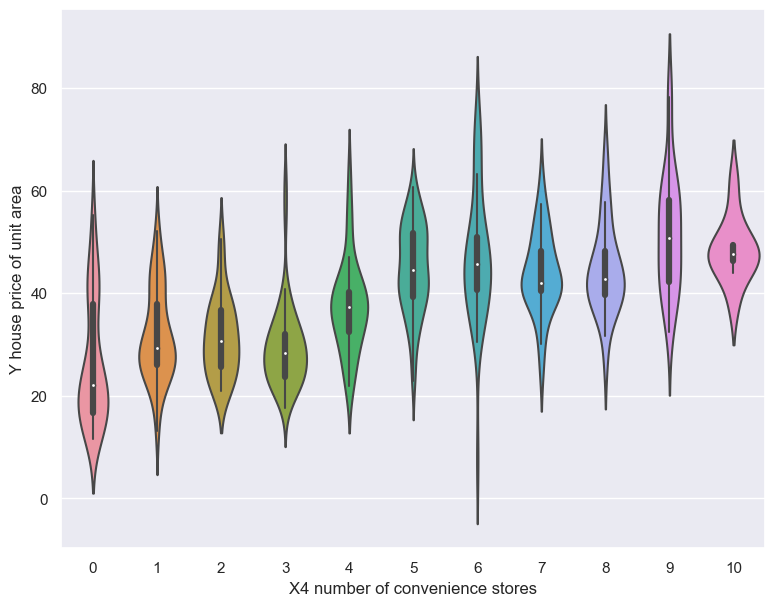

In [178]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=file, x='X4 number of convenience stores', y='Y house price of unit area')
plt.show()

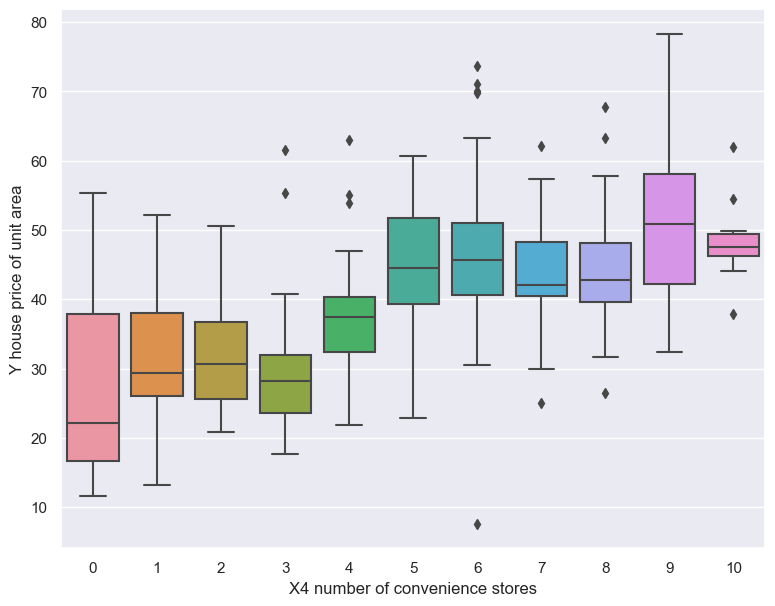

In [179]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.boxplot(data=file, x='X4 number of convenience stores', y='Y house price of unit area')
plt.show()

### Effect of distance to the nearest MRT station on price

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='House price of unit area'>

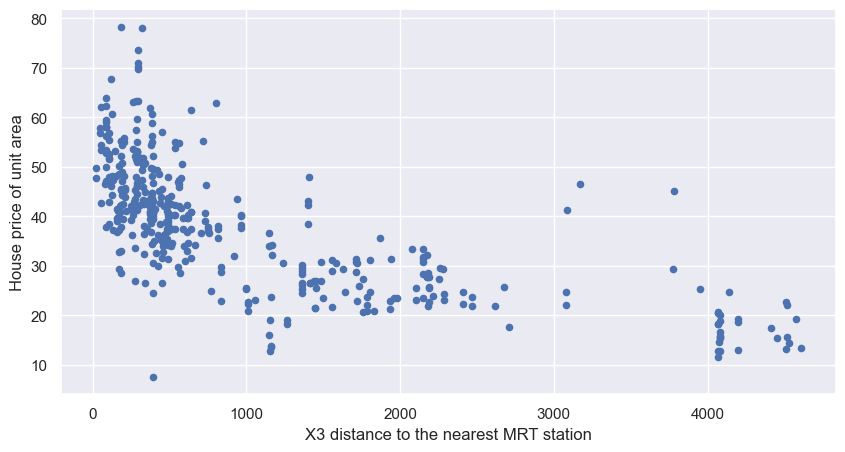

In [180]:
file.plot(kind='scatter', x='X3 distance to the nearest MRT station', y='Y house price of unit area', figsize=(10, 5),
          xlabel='X3 distance to the nearest MRT station', ylabel='House price of unit area')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6296\2843116756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearHouse['Dataset'] = 'near'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6296\2843116756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farHouse['Dataset'] = 'far'


<AxesSubplot: xlabel='Dataset', ylabel='Y house price of unit area'>

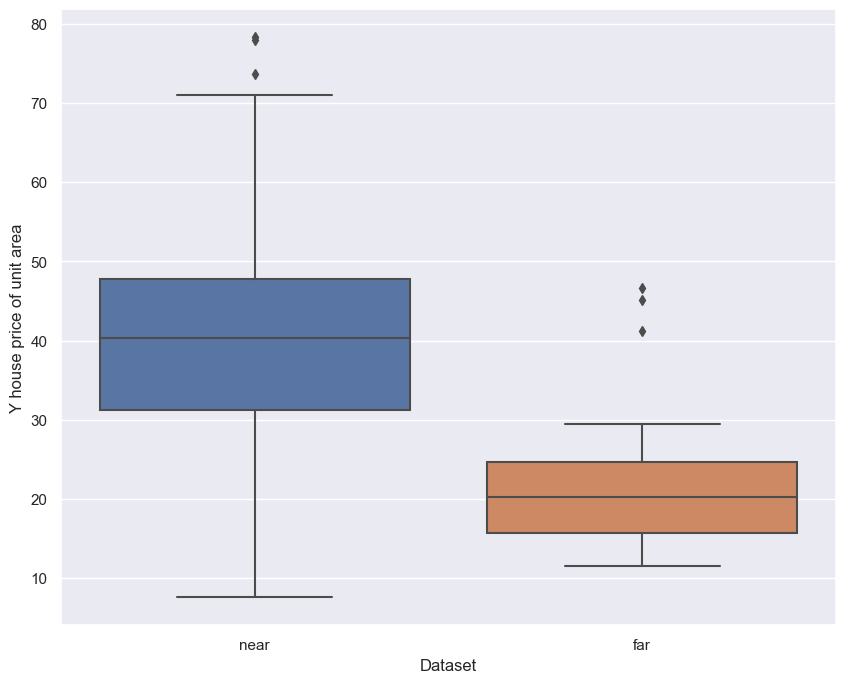

In [181]:
nearHouse = file[file['X3 distance to the nearest MRT station'] < 2250]
farHouse = file[file['X3 distance to the nearest MRT station'] >= 2250]
nearHouse['Dataset'] = 'near'
farHouse['Dataset'] = 'far'
merged_df = pd.concat([nearHouse, farHouse])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(x='Dataset', y='Y house price of unit area', data=merged_df)

<AxesSubplot: xlabel='Dataset', ylabel='Y house price of unit area'>

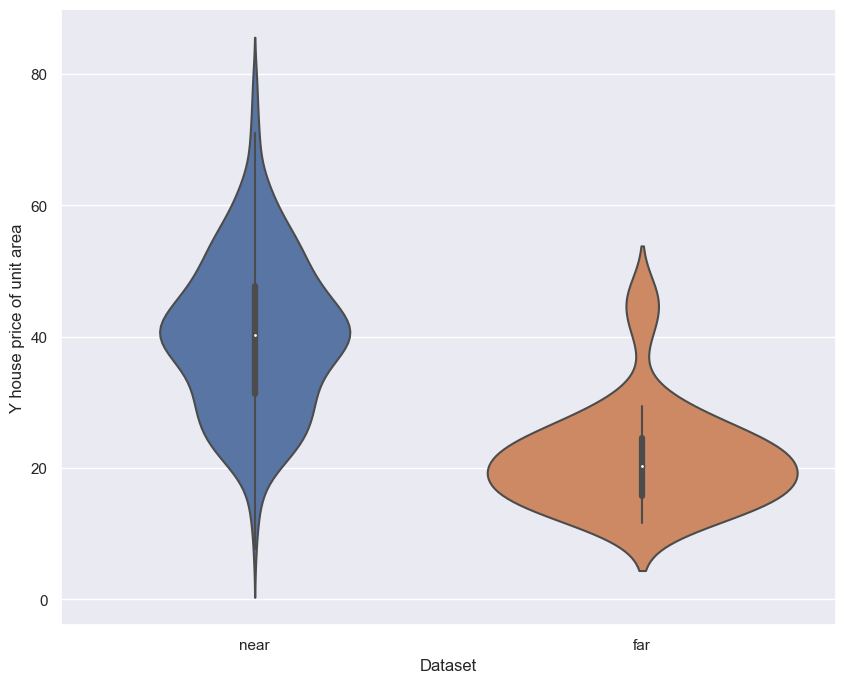

In [182]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df)

# Tests

## 1.Test if the average price per unit area of houses above the median age is significantly different from those below the median age. Use p-value method. ##
__$H_{0}$__ : $\mu_{old} = \mu_{new}$
__$H_{1}$__ : $\mu_{old} \neq \mu_{new}$
$\alpha = 0.05$

In [183]:
from scipy import stats
temp = pd.read_csv('Real estate.csv')
old_house = temp[temp['X2 house age'] >= 16.1]
new_house = temp[temp['X2 house age'] < 16.1]
alpha = 0.05
stat, p_value = stats.ttest_ind(old_house['Y house price of unit area'], new_house['Y house price of unit area'], equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 5.404452714497797e-07
The null hypothesis will be rejected!


## 2.Investigate if the average price per unit area significantly differs by the number of convenience stores (categorized by "X4 number of convenience stores").
__$H_{0}$__ : $\mu_{0} = \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5} = \mu_{6} = \mu_{7} = \mu_{8} = \mu_{9} = \mu_{10}$
__$H_{1}$__ : $\mu_{0} \neq \mu_{1} \neq \mu_{2} \neq \mu_{3} \neq \mu_{4} \neq \mu_{5} \neq \mu_{6} \neq \mu_{7} \neq \mu_{8} \neq \mu_{9} \neq \mu_{10}$

In [184]:
temp = pd.read_csv('Real estate.csv')
stat, p_value = stats.f_oneway(temp[temp['X4 number of convenience stores'] == 0]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 1]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 2]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 3]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 4]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 5]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 6]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 7]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 8]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 9]['Y house price of unit area'],
                               temp[temp['X4 number of convenience stores'] == 10]['Y house price of unit area'])

print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 1.1781067247237561e-36
The null hypothesis will be rejected!


## 3.Choose two categorical variables and test if there's a significant association between them. (You may need to categorize some numerical variables.)

In [185]:
new_data = pd.read_csv('Real estate.csv')
new_data['qualitative longitude'] = new_data['X6 longitude'].apply(lambda x: 'H' if x >= 121.53863  else 'L')
new_data['qualitative age'] = new_data['X2 house age'].apply(lambda x: 'old' if x >= 16.1  else 'new')
new_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,qualitative longitude,qualitative age
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,H,old
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,H,old
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,H,new
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,H,new
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,H,new
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,L,new
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,L,old
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,H,old
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,L,old
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,L,old


In [186]:
contingency_table = pd.crosstab(new_data['qualitative age'], new_data['qualitative longitude'])
print('contingency_table : \n', contingency_table)

contingency_table : 
 qualitative longitude    H    L
qualitative age                
new                    107   98
old                    102  107


In [187]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)
print('chi2 stat : {} , p_value : {}'.format(chi2_stat, p_value))

chi2 stat : 0.3501354884019943 , p_value : 0.5540364433965241


## Calculating correlation between each variable and target variable.

<Figure size 300x100 with 0 Axes>

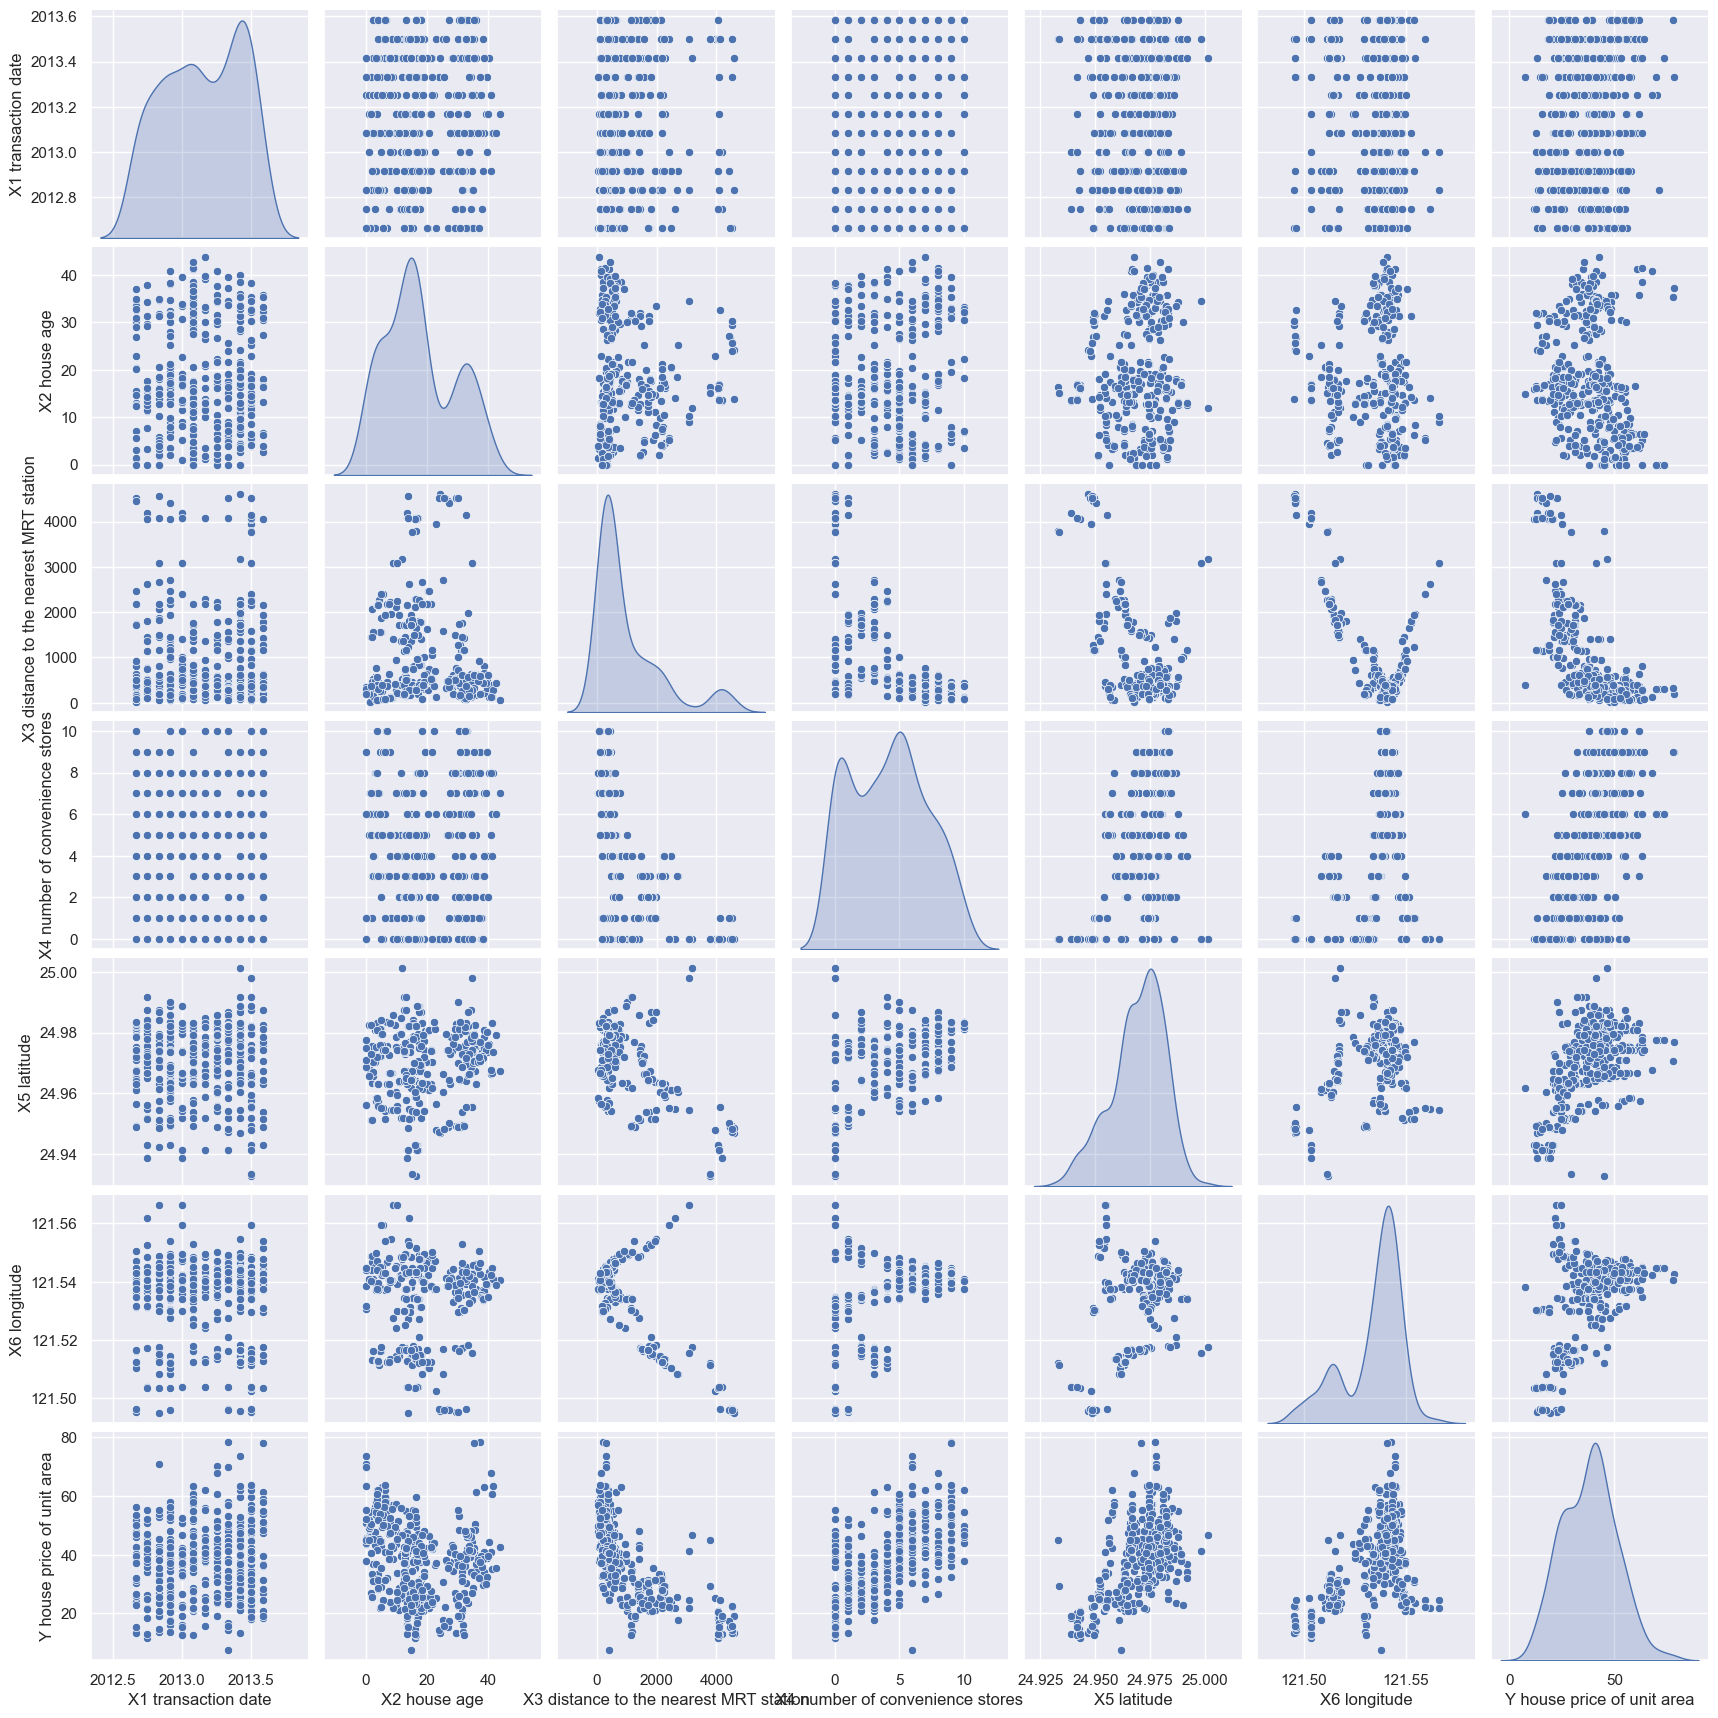

In [188]:
plt.figure(figsize=(3, 1))
sns.pairplot(file, diag_kind="kde")

<AxesSubplot: >

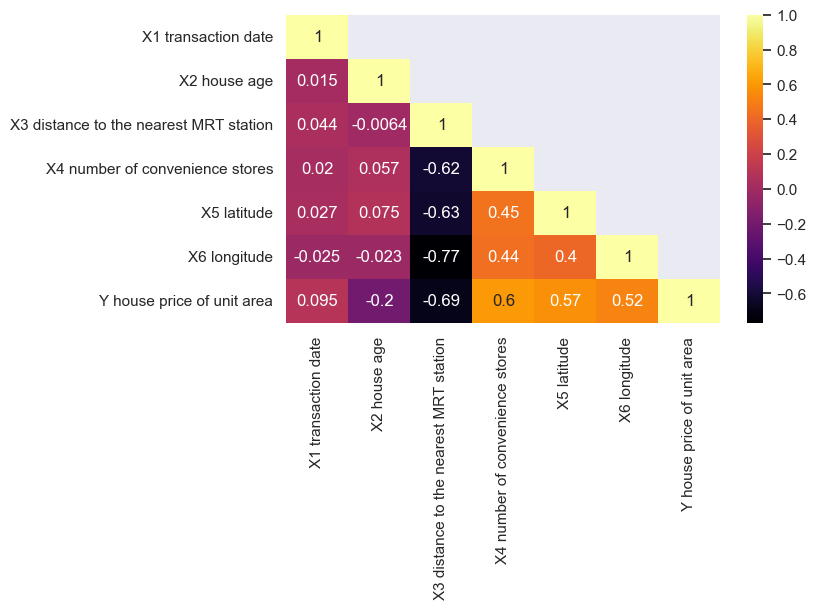

In [189]:
corr_matrix = file.corr()
plt.figure(figsize=(7, 4))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

# Regression

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(file)
x = dataset[:, :-1]
y = dataset[:,  -1]

### Splitting the dataset into the Training set and Test set

In [193]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)

### Training the Simple Linear Regression model on the Training set

In [194]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)

LinearRegression()

In [195]:
regressor.coef_

array([ 0.06, -0.17, -0.27,  0.17,  0.24,  0.05])

### Predicting the Test  set result

In [196]:
yPred = regressor.predict(xTest)

In [197]:
np.set_printoptions(precision=2)
print(np.concatenate((yPred.reshape(len(yPred), 1), yTest.reshape(len(yTest), 1)), 1))

[[0.26 0.21]
 [0.36 0.25]
 [0.53 0.41]
 [0.38 0.47]
 [0.47 0.45]
 [0.67 0.6 ]
 [0.47 0.85]
 [0.41 0.37]
 [0.05 0.21]
 [0.4  0.41]
 [0.47 0.39]
 [0.63 0.55]
 [0.45 0.38]
 [0.54 0.57]
 [0.29 0.27]
 [0.42 0.38]
 [0.31 0.34]
 [0.32 0.35]
 [0.35 0.23]
 [0.38 0.19]
 [0.03 0.14]
 [0.34 0.3 ]
 [0.49 0.42]
 [0.68 0.77]
 [0.56 0.49]
 [0.44 0.44]
 [0.45 0.43]
 [0.32 0.42]
 [0.39 0.32]
 [0.35 0.19]
 [0.48 0.6 ]
 [0.55 0.5 ]
 [0.28 0.48]
 [0.09 0.16]
 [0.44 0.46]
 [0.27 0.2 ]
 [0.48 0.41]
 [0.53 0.49]
 [0.5  0.51]
 [0.22 0.07]
 [0.22 0.14]
 [0.58 0.59]
 [0.34 0.21]
 [0.6  0.63]
 [0.56 0.7 ]
 [0.39 0.34]
 [0.51 0.51]
 [0.33 0.19]
 [0.39 0.29]
 [0.57 0.53]
 [0.23 0.16]
 [0.61 0.61]
 [0.54 0.49]
 [0.08 0.13]
 [0.47 0.35]
 [0.53 0.45]
 [0.57 0.57]
 [0.45 0.32]
 [0.39 0.36]
 [0.52 0.64]
 [0.61 0.6 ]
 [0.42 0.46]
 [0.04 0.1 ]
 [0.41 0.75]
 [0.5  0.47]
 [0.59 0.7 ]
 [0.4  0.37]
 [0.05 0.1 ]
 [0.51 0.46]
 [0.49 0.43]
 [0.05 0.16]
 [0.06 0.07]
 [0.53 0.46]
 [0.5  0.63]
 [0.5  0.49]
 [0.1  0.15]
 [0.47 0.45]

### Evaluating the Model Performance on test data

In [198]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('R_squared = ', end='')
print(r2_score(yTest, yPred))
print('MSE = ', end='')
print(mean_squared_error(yTest, yPred))

R_squared = 0.6747435155743438
MSE = 0.010418962824344905


### Predicting the train set result

In [199]:
yPred = regressor.predict(xTrain)

In [200]:
np.set_printoptions(precision=2)
print(np.concatenate((yPred.reshape(len(yPred), 1), yTrain.reshape(len(yTrain), 1)), 1))

[[ 0.52  0.35]
 [ 0.62  0.64]
 [ 0.38  0.44]
 [ 0.35  0.24]
 [ 0.54  0.38]
 [ 0.52  0.63]
 [ 0.57  0.67]
 [ 0.35  0.32]
 [ 0.57  0.52]
 [ 0.63  0.93]
 [ 0.34  0.22]
 [ 0.05  0.06]
 [ 0.31  0.19]
 [ 0.37  0.25]
 [ 0.47  0.49]
 [ 0.24  0.26]
 [ 0.46  0.49]
 [ 0.57  0.54]
 [ 0.48  0.34]
 [ 0.36  0.32]
 [ 0.36  0.45]
 [ 0.52  0.51]
 [ 0.62  0.88]
 [ 0.63  0.53]
 [ 0.49  0.56]
 [ 0.43  0.5 ]
 [ 0.47  0.42]
 [ 0.35  0.31]
 [ 0.51  0.56]
 [ 0.48  0.31]
 [ 0.53  0.42]
 [ 0.57  0.58]
 [ 0.53  0.66]
 [ 0.52  0.43]
 [ 0.57  0.63]
 [ 0.5   0.55]
 [ 0.21  0.12]
 [ 0.09  0.24]
 [ 0.05  0.07]
 [ 0.36  0.33]
 [ 0.55  0.5 ]
 [ 0.1   0.15]
 [ 0.53  0.35]
 [ 0.29  0.34]
 [ 0.38  0.3 ]
 [ 0.6   0.57]
 [ 0.61  0.79]
 [ 0.5   0.54]
 [ 0.25  0.23]
 [ 0.04  0.16]
 [ 0.66  0.8 ]
 [ 0.4   0.33]
 [ 0.45  0.33]
 [ 0.5   0.52]
 [ 0.41  0.4 ]
 [ 0.52  0.49]
 [ 0.53  0.44]
 [ 0.49  0.53]
 [ 0.41  0.49]
 [ 0.59  0.67]
 [ 0.21  0.09]
 [ 0.43  0.61]
 [ 0.42  0.42]
 [ 0.39  0.78]
 [ 0.44  0.3 ]
 [ 0.5   0.  ]
 [ 0.48  0

### Evaluating the Model Performance on train data

In [201]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('R_squared = ', end='')
print(r2_score(yTrain, yPred))
print('MSE = ', end='')
print(mean_squared_error(yTrain, yPred))

R_squared = 0.6016910752135003
MSE = 0.01316352275757957
